In [85]:
import sys
import numpy
import pickle
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [86]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

In [87]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [88]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                       mean       std    median      5.0%     95.0%     n_eff     r_hat
             A[0]      0.14      0.57      0.20     -0.72      1.00   4032.72      1.00
       alpha_1[0]     -3.99      0.66     -4.07     -5.00     -3.12   1864.12      1.00
       alpha_2[0]     -0.30      0.53     -0.28     -1.19      0.51   1087.70      1.00
        beta_1[0]      1.29      2.20      1.41     -1.78      4.99   4132.76      1.00
        beta_2[0]      2.27      0.77      2.18      1.01      3.47   2103.46      1.00
      beta_gap[0]      1.04      0.49      1.02      0.26      1.85   3516.86      1.00
      eta_high[0]     25.06     14.28     24.99      4.65     49.04   7297.89      1.00
       eta_low[0]     24.84     14.45     24.74      0.52     45.41   4845.12      1.00
       eta_max[0]      4.48      2.75      4.28      0.00      8.52   3695.43      1.00
       eta_min[0]     30.51     11.67     30.66     13.89     49.77   6584.23      1.00
    gamma_high[0]      6.04    

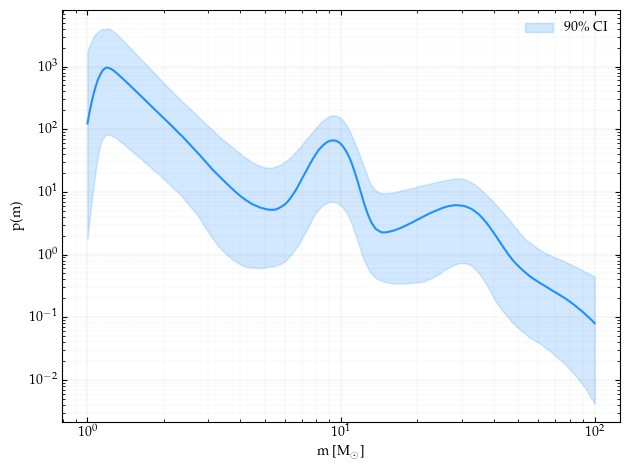

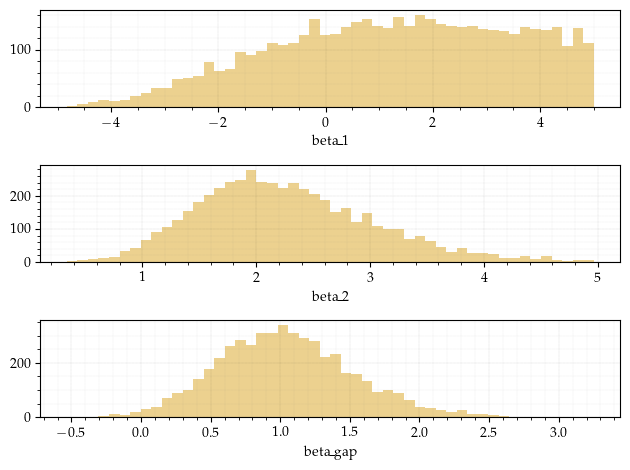

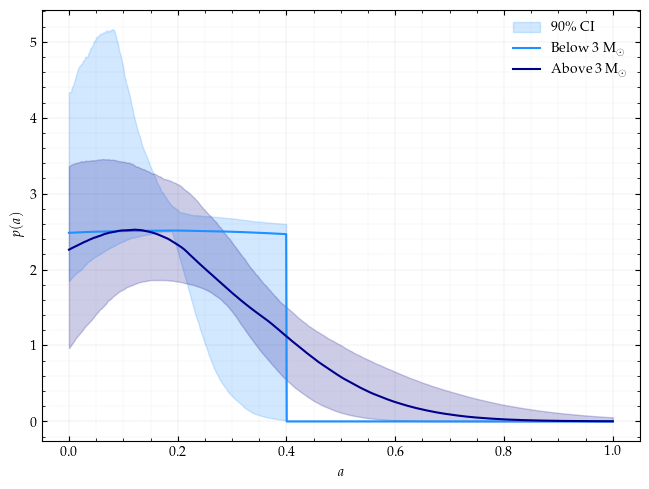

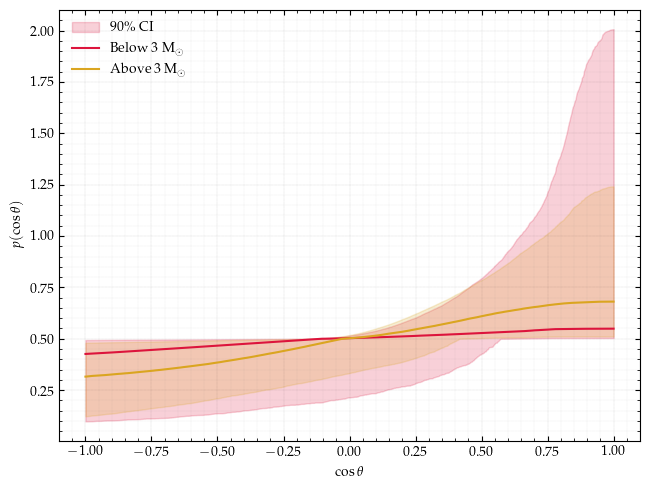

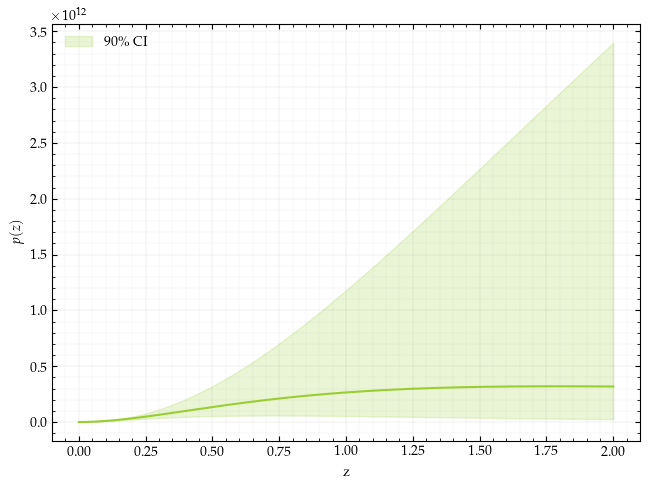

In [89]:
try:
    from config.mass1d_func import pdb_with_NG as mass1d_func
except:
    from config.mass1d_func import multi_pdb as mass1d_func
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=mass1d_func)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [90]:
import os
import arviz as az

if os.path.exists("results/trace1.png") or os.path.exists("results/trace2.png") or os.path.exists("results/trace.png"):
    print("Trace plots already exist, skipping generation")
else:
    print("Generating trace plots")
    data = az.from_numpyro(mcmc)
    var_names_lst = get_non_deterministic_params(mcmc)

    if len(var_names_lst) >= 20:
        cut1 = var_names_lst[:20]
        cut2 = var_names_lst[20:]

        assert len(cut1) + len(cut2) == len(var_names_lst)

        az.plot_trace(data, var_names=cut1, compact=True)
        plt.savefig("results/trace1.png")
        az.plot_trace(data, var_names=cut2, compact=True)
        plt.savefig("results/trace2.png")
    else:
        az.plot_trace(data, var_names=var_names_lst, compact=True)
        plt.savefig("results/trace.png")

Trace plots already exist, skipping generation


In [91]:
# from model_vector import model_vector
#
# import os
#
# # try:
# #     os.remove("results/postprocessed_samples")
# # except: pass
#
# if os.path.exists("results/postprocessed_samples"):
#     with open("results/postprocessed_samples", "rb") as f:
#         postprocessed_posterior_samples = pickle.load(f)
# else:
#     postprocessed_posterior_samples = add_postprocessing_effects(posterior_samples, model_vector)
#     with open("results/postprocessed_samples", "wb") as f:
#         pickle.dump(postprocessed_posterior_samples, f)
#
# config = configparser.ConfigParser()
# config.read('config/config.ini')
# event_folder_name = config["DIRECTORIES"]["event_folder_name"]
# event_file_name = config["DIRECTORIES"]["event_file_name"]
# translate_dir = "../../"
# events = numpy.loadtxt(translate_dir+event_folder_name+event_file_name, dtype=str)
#
# for event_i in tqdm(range(len(postprocessed_posterior_samples["neff_events"].T))):
#     neff = postprocessed_posterior_samples["neff_events"].T[event_i]
#     filename = events[event_i][:14]
#     plot_neff(neff, filename)
#     plt.close()

In [92]:
# plot_neff(postprocessed_posterior_samples["neff_selection"], "selection")
# plot_neff(postprocessed_posterior_samples["neff_events_total"], "events_total")
# plot_neff(postprocessed_posterior_samples["loglike_var"], "loglike_var")
# plt.xlabel("loglike_var")
# plt.axvspan(1, max(postprocessed_posterior_samples["loglike_var"]), color = "red", label = "Var samples greater than 1", alpha = 0.2)
# plt.savefig("results/loglike_var.png")
#
# plt.figure()
# plot_corner(postprocessed_posterior_samples["sig_peak1"], postprocessed_posterior_samples["neff_selection"], "sig_peak1", "neff_selection")
# plt.figure()
# plot_corner(postprocessed_posterior_samples["sig_peak1"], postprocessed_posterior_samples["neff_events_total"], "sig_peak1", "neff_all_pe")

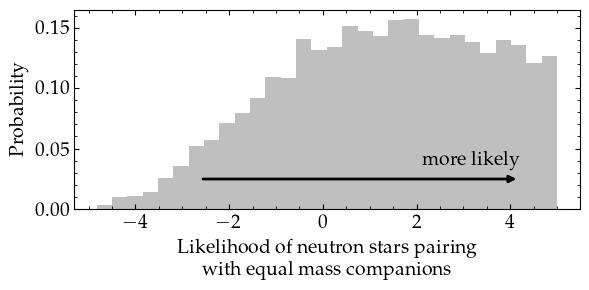

In [104]:
beta_NS = posterior_samples["beta_1"]

FONTSIZE = 14

plt.figure(figsize=(6, 3))
plt.hist(beta_NS, bins=30, color = "grey", density=True, alpha = 0.5)
ax = plt.gca()
ax.tick_params(direction="in", which="both", right = True, top = True,labelsize=FONTSIZE)
ax.minorticks_on()

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

# Horizontal right-facing arrow glued to the bottom of the axes
xbase = 0.15
ax.annotate(
    "", xy=(0.88, xbase), xytext=(0.25, xbase),
    xycoords=ax.transAxes, textcoords=ax.transAxes,
    arrowprops=dict(arrowstyle="-|>", lw=2),
    annotation_clip=False, zorder=5
)

# Separate label on the right, just above the arrow
ax.text(
    0.88, xbase+0.04, "more likely",
    transform=ax.transAxes,
    ha="right", va="bottom", fontsize=FONTSIZE
)

plt.ylabel("Probability", fontsize=FONTSIZE)
plt.xlabel("Likelihood of neutron stars pairing\nwith equal mass companions", fontsize=FONTSIZE)
plt.savefig("pairingBNS.png", dpi = 300)
plt.show()

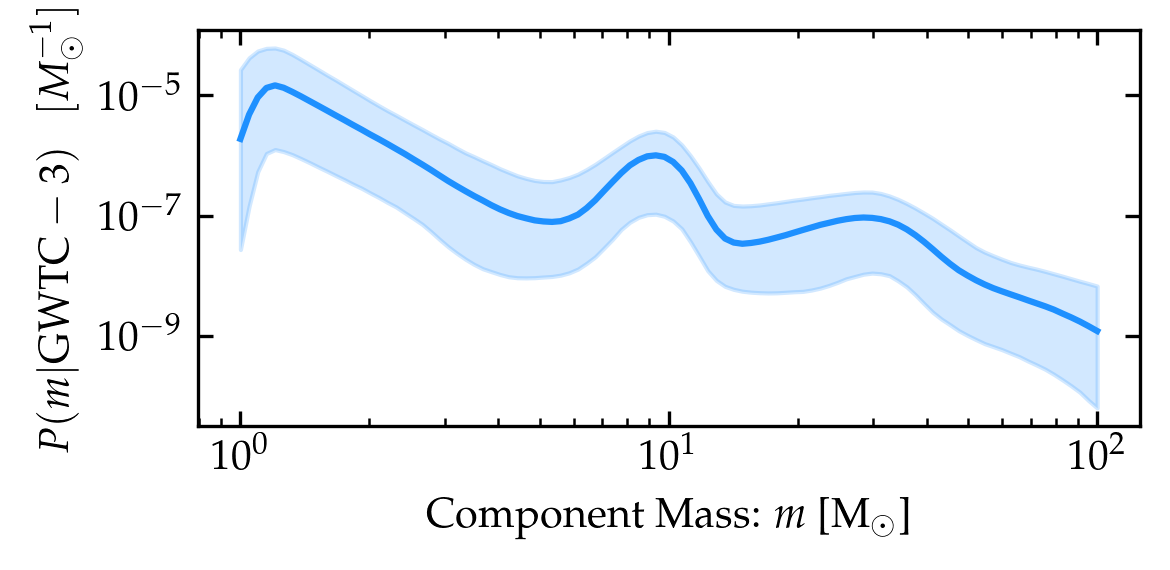

In [100]:
plt.figure(figsize=(4, 2), dpi=300)
params = get_params_of_function(func_type="mass1d_func")
params_samples = {param: posterior_samples[param] for param in params if param in posterior_samples.keys()}
m = np.logspace(0, 2, 100)
p_m = multi_pdb(m, **params_samples, model_min=1, model_max=100)
p_m = p_m / np.sum(p_m)
p50 = np.median(p_m, axis=0)
p95 = np.percentile(p_m, 95, axis=0)
p05 = np.percentile(p_m, 5, axis=0)
# plt.plot(m, p_m.T, alpha = 1/255, color="grey")
plt.fill_between(m, p05, p95, color="dodgerblue", alpha=0.2, label="90\% CI")
plt.plot(m, p50, color="dodgerblue")
ax = plt.gca()
ax.tick_params(direction="in", which="both", top=True, right=True)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Component Mass: $m$ [M$_\odot$]")
plt.ylabel(r"$P(m|\mathrm{GWTC-3}) \hspace{0.1in} [M_{\odot}^{-1}]$")
plt.savefig("results/paper_plot_mass.png", bbox_inches='tight')

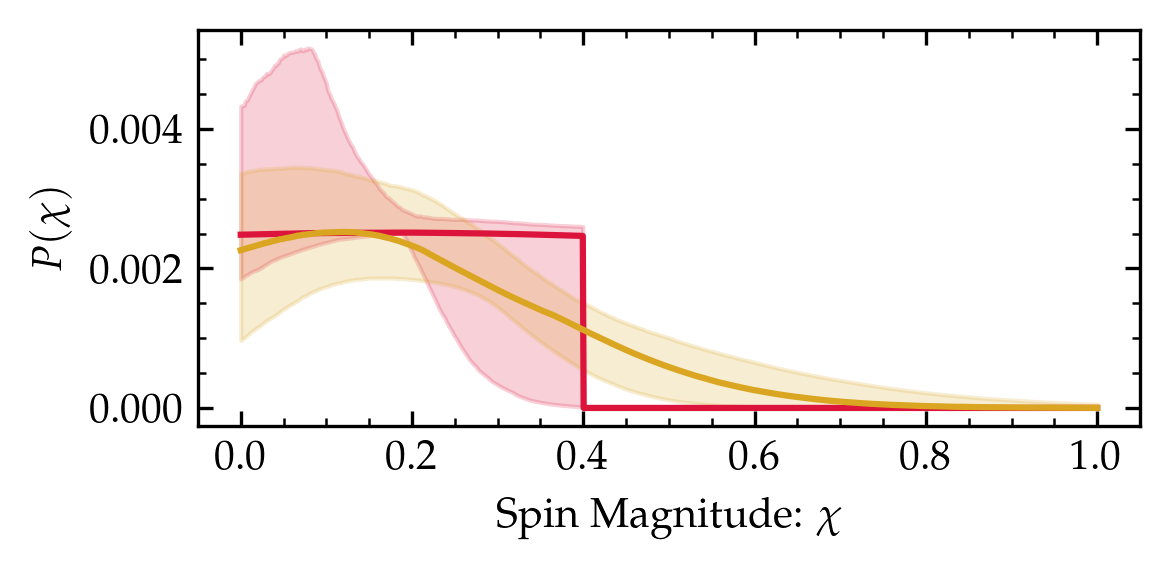

In [101]:
c_below = "crimson"
c_above = "goldenrod"

plt.figure(figsize=(4, 2), dpi=300)
params = get_params_of_function(func_type="spin_func", function_name="prob_chi")
params_samples = {param: posterior_samples[param] for param in params if param in posterior_samples.keys()}
a = np.linspace(0, 1, 1000)
m_below = 1
m_above = 10
msb = 3
p_a_below = prob_chi(a, m=m_below, **params_samples, m_spin_break=msb, a_min=0, a_max=1, a_max_NS=0.4)
p_a_above = prob_chi(a, m=m_above, **params_samples, m_spin_break=msb, a_min=0, a_max=1, a_max_NS=0.4)
p_a_above = p_a_above / np.sum(p_a_above, axis=1)[:, None]
p_a_below = p_a_below / np.sum(p_a_below, axis=1)[:, None]
p50_below = np.median(p_a_below, axis=0)
p95_below = np.percentile(p_a_below, 95, axis=0)
p05_below = np.percentile(p_a_below, 5, axis=0)
p50_above = np.median(p_a_above, axis=0)
p95_above = np.percentile(p_a_above, 95, axis=0)
p05_above = np.percentile(p_a_above, 5, axis=0)
plt.fill_between(a, p05_below, p95_below, color=c_below, alpha=0.2)
plt.plot(a, p50_below, color=c_below, label=f"Below {msb} M$_\odot$")
plt.fill_between(a, p05_above, p95_above, color=c_above, alpha=0.2)
plt.plot(a, p50_above, color=c_above, label=f"Above {msb} M$_\odot$")

# plt.ylim(0, 1)
ax = plt.gca()
ax.tick_params(direction="in", which="both", top=True, right=True)
ax.minorticks_on()

plt.xlabel(r"Spin Magnitude: $\chi$")
plt.ylabel(r"$P(\chi)$")
plt.savefig("results/paper_plots_chi.png", bbox_inches='tight')

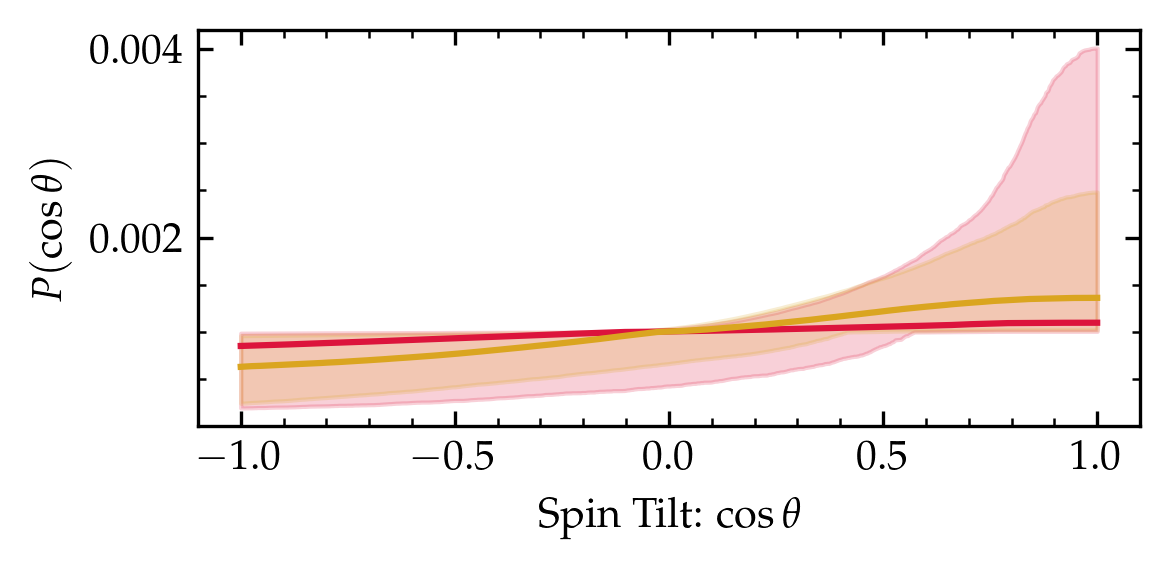

In [102]:
plt.figure(figsize=(4, 2), dpi=300)
params = get_params_of_function(func_type="spin_func", function_name="prob_costilt")
params_samples = {param: posterior_samples[param] for param in params if param in posterior_samples.keys()}
costilt = np.linspace(-1, 1, 1000)
m_below = 1
m_above = 10
msb = 3
p_costilt_below = prob_costilt(costilt, m=m_below, **params_samples, m_spin_break=msb, costilt_max=1,
                           costilt_min=-1)
p_costilt_below = p_costilt_below / np.sum(p_costilt_below, axis=1)[:, None]
p_costilt_above = prob_costilt(costilt, m=m_above, **params_samples, m_spin_break=msb, costilt_max=1,
                           costilt_min=-1)
p_costilt_above = p_costilt_above / np.sum(p_costilt_above, axis=1)[:, None]

p50_below = np.median(p_costilt_below, axis=0)
p95_below = np.percentile(p_costilt_below, 95, axis=0)
p05_below = np.percentile(p_costilt_below, 5, axis=0)
p50_above = np.median(p_costilt_above, axis=0)
p95_above = np.percentile(p_costilt_above, 95, axis=0)
p05_above = np.percentile(p_costilt_above, 5, axis=0)
plt.fill_between(costilt, p05_below, p95_below, color=c_below, alpha=0.2, label="90\% CI")
plt.plot(costilt, p50_below, color=c_below, label=f"Below {msb} M$_\odot$")
plt.fill_between(costilt, p05_above, p95_above, color=c_above, alpha=0.2)
plt.plot(costilt, p50_above, color=c_above, label=f"Above {msb} M$_\odot$")

ax = plt.gca()
ax.tick_params(direction="in", which="both", top=True, right=True)
ax.minorticks_on()

plt.xlabel(r"Spin Tilt: $\cos\theta$")
plt.ylabel(r"$P(\cos\theta)$")
plt.savefig("results/paper_plot_tilt.png", bbox_inches='tight')

/var/folders/hr/fxn20ncj0qq2_mtm8k66bl7r0000gn/T/ipykernel_60277/1237196911.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("results/paper_plots_spin_combined.png", bbox_inches="tight")
/var/folders/hr/fxn20ncj0qq2_mtm8k66bl7r0000gn/T/ipykernel_60277/1237196911.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("results/paper_plots_spin_combined.png", bbox_inches="tight")
/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


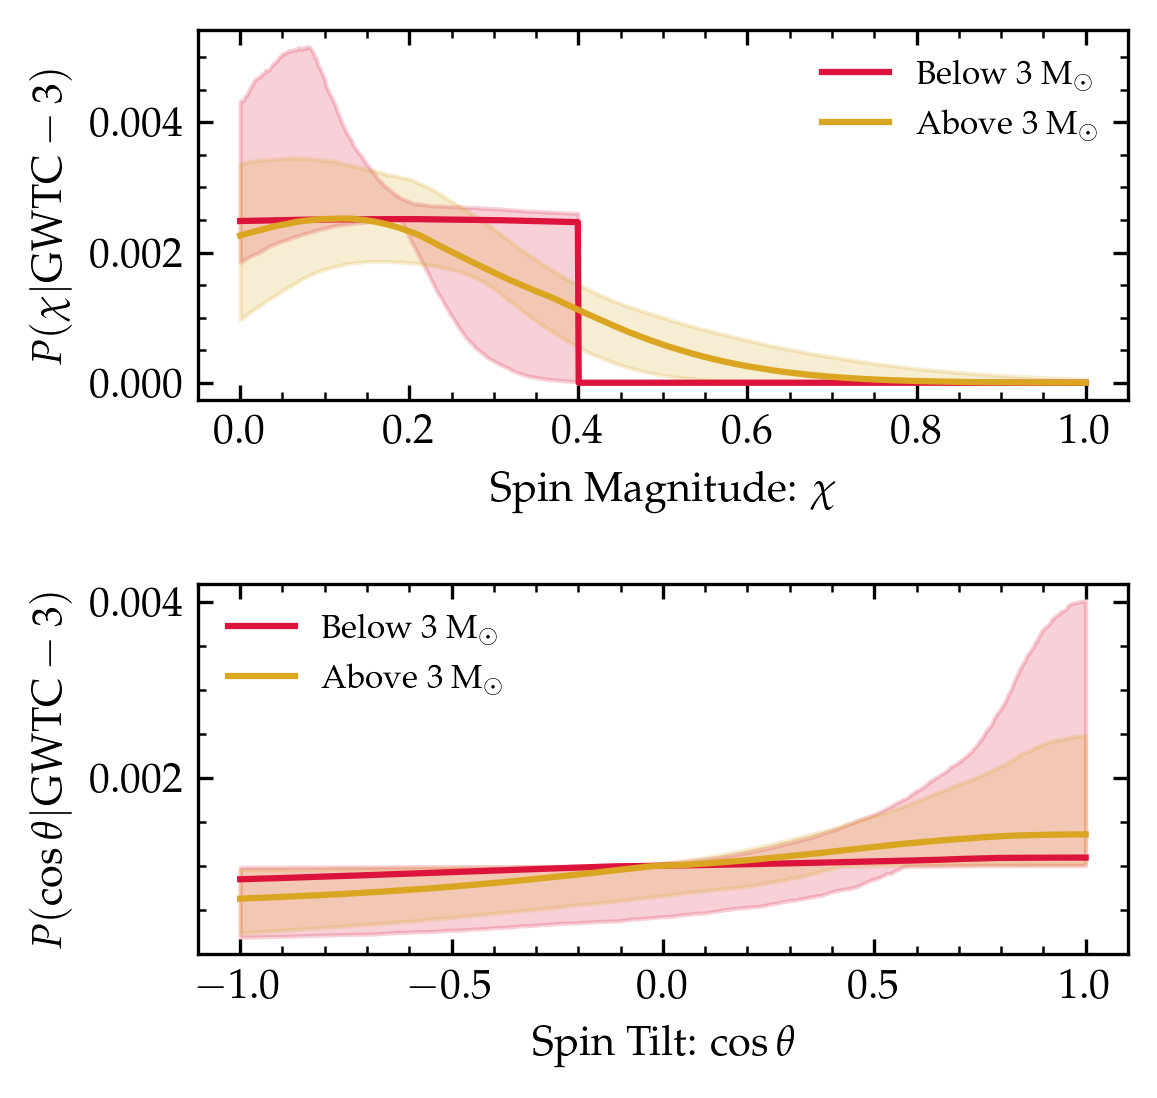

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

c_below = "crimson"
c_above = "goldenrod"

fig = plt.figure(figsize=(4, 4), dpi=300)
gs = gridspec.GridSpec(2, 1, hspace=0.5)

# ---------- Spin Magnitude ----------
ax0 = fig.add_subplot(gs[0])

params = get_params_of_function(func_type="spin_func", function_name="prob_chi")
params_samples = {param: posterior_samples[param] for param in params if param in posterior_samples.keys()}

a = np.linspace(0, 1, 1000)
m_below, m_above, msb = 1, 10, 3

p_a_below = prob_chi(a, m=m_below, **params_samples, m_spin_break=msb, a_min=0, a_max=1, a_max_NS=0.4)
p_a_above = prob_chi(a, m=m_above, **params_samples, m_spin_break=msb, a_min=0, a_max=1, a_max_NS=0.4)

p_a_below = p_a_below / np.sum(p_a_below, axis=1)[:, None]
p_a_above = p_a_above / np.sum(p_a_above, axis=1)[:, None]

p50_below, p95_below, p05_below = np.median(p_a_below, axis=0), np.percentile(p_a_below, 95, axis=0), np.percentile(p_a_below, 5, axis=0)
p50_above, p95_above, p05_above = np.median(p_a_above, axis=0), np.percentile(p_a_above, 95, axis=0), np.percentile(p_a_above, 5, axis=0)

ax0.fill_between(a, p05_below, p95_below, color=c_below, alpha=0.2)
ax0.plot(a, p50_below, color=c_below, label=f"Below {msb} M$_\odot$")
ax0.fill_between(a, p05_above, p95_above, color=c_above, alpha=0.2)
ax0.plot(a, p50_above, color=c_above, label=f"Above {msb} M$_\odot$")

ax0.set_xlabel(r"Spin Magnitude: $\chi$")
ax0.set_ylabel(r"$P(\chi|\mathrm{GWTC-3})$")
ax0.tick_params(direction="in", which="both", top=True, right=True)
ax0.minorticks_on()
ax0.legend(frameon=False, fontsize=8)

# ---------- Spin Tilt ----------
ax1 = fig.add_subplot(gs[1])

params = get_params_of_function(func_type="spin_func", function_name="prob_costilt")
params_samples = {param: posterior_samples[param] for param in params if param in posterior_samples.keys()}

costilt = np.linspace(-1, 1, 1000)

p_costilt_below = prob_costilt(costilt, m=m_below, **params_samples, m_spin_break=msb, costilt_max=1, costilt_min=-1)
p_costilt_above = prob_costilt(costilt, m=m_above, **params_samples, m_spin_break=msb, costilt_max=1, costilt_min=-1)

p_costilt_below = p_costilt_below / np.sum(p_costilt_below, axis=1)[:, None]
p_costilt_above = p_costilt_above / np.sum(p_costilt_above, axis=1)[:, None]

p50_below, p95_below, p05_below = np.median(p_costilt_below, axis=0), np.percentile(p_costilt_below, 95, axis=0), np.percentile(p_costilt_below, 5, axis=0)
p50_above, p95_above, p05_above = np.median(p_costilt_above, axis=0), np.percentile(p_costilt_above, 95, axis=0), np.percentile(p_costilt_above, 5, axis=0)

ax1.fill_between(costilt, p05_below, p95_below, color=c_below, alpha=0.2)
ax1.plot(costilt, p50_below, color=c_below, label=f"Below {msb} M$_\odot$")
ax1.fill_between(costilt, p05_above, p95_above, color=c_above, alpha=0.2)
ax1.plot(costilt, p50_above, color=c_above, label=f"Above {msb} M$_\odot$")

ax1.set_xlabel(r"Spin Tilt: $\cos\theta$")
ax1.set_ylabel(r"$P(\cos\theta|\mathrm{GWTC-3})$")
ax1.tick_params(direction="in", which="both", top=True, right=True)
ax1.minorticks_on()
ax1.legend(frameon=False, fontsize=8)

plt.savefig("results/paper_plots_spin_combined.png", bbox_inches="tight")
plt.show()
